In [1]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
seeds = np.arange(50)
rmse_best_all = []
filenames = np.arange(55, 463+51, 51)
sizes = np.arange(51, 459+51, 51)

In [3]:
rmse_all = []
for seed in seeds:
    with open(
        "Results/Evaluation_Data/fhn_d005-o3n-13n_18.04.2024/" \
        f"RNN-esn2_auto-RDIM_3-N_used_30000-SIZE_9-D_9-RADIUS_1.9-SIGMA_1-DL_10000-NL_0-IPL_20000-REG_0.0001-WID_{seed}/" \
        "results.pickle",
        "rb") as infile:
        data = pickle.load(infile)
    pred = data['predictions_all_TEST'][0, :, 0]
    true = data['truths_all_TEST'][0, :, 0]
    rmse = mean_squared_error(true, pred, squared=False)
    rmse_all.append(rmse)
rmse_all = np.array(rmse_all)
rmse_best_all.append(np.min(rmse_all))

In [4]:
for size, filename in zip(sizes, filenames):
    rmse_all = []
    for seed in seeds:
        with open(
            f"Results/Evaluation_Data/fhn_d005-o3n-{filename}n_18.04.2024/" \
            f"RNN-esn2_auto-RDIM_3-N_used_30000-SIZE_{size}-D_10-RADIUS_1.9-SIGMA_1-DL_10000-NL_0-IPL_20000-REG_0.0001-WID_{seed}/" \
            "results.pickle",
            "rb") as infile:
            data = pickle.load(infile)
        pred = data['predictions_all_TEST'][0, :, 0]
        true = data['truths_all_TEST'][0, :, 0]
        rmse = mean_squared_error(true, pred, squared=False)
        rmse_all.append(rmse)
    rmse_all = np.array(rmse_all)
    rmse_best_all.append(np.min(rmse_all))

In [5]:
rmse_all = []
for seed in seeds:
    with open(
        "Results/Evaluation_Data/fhn_d005-o3n-505n_18.04.2024/" \
        f"RNN-esn2_auto-RDIM_3-N_used_30000-SIZE_501-D_10-RADIUS_1.9-SIGMA_1-DL_10000-NL_0-IPL_20000-REG_0.0001-WID_{seed}/" \
        "results.pickle",
        "rb") as infile:
        data = pickle.load(infile)
    pred = data['predictions_all_TEST'][0, :, 0]
    true = data['truths_all_TEST'][0, :, 0]
    rmse = mean_squared_error(true, pred, squared=False)
    rmse_all.append(rmse)
rmse_all = np.array(rmse_all)
rmse_best_all.append(np.min(rmse_all))

In [6]:
sizes = np.concatenate([[9], sizes, [501]])

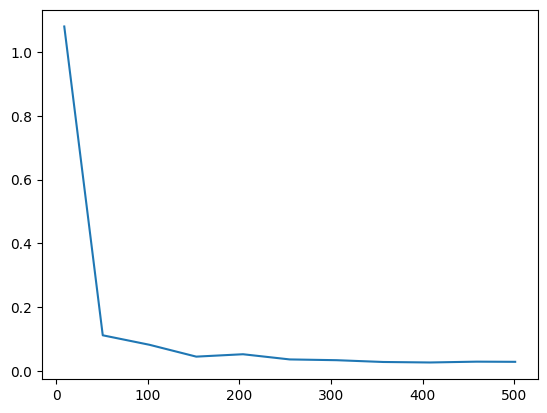

In [7]:
plt.plot(sizes, rmse_best_all)